# Directory loading

In [122]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

# get current working directory
my_dir = os.getcwd()
print(my_dir[:-15])
# change this accordingly
glioma_path = my_dir[:-15] + "/data/glioma_tumor/"
meningioma_path = my_dir[:-15] + "/data/meningioma_tumor/"
pituitary_path = my_dir[:-15] + "/data/pituitary_tumor/"
normal_path = my_dir[:-15] + "/data/normal_tumor/"


/Users/reese/Documents/School/UC Santa Barbra /PSTAT/PSTAT197/vignette-cnn


# Image Loading

In [123]:
def load_images(path):
    '''
    This function will load the data from the folders and store them in a list to then be preprocessed
    input: folder path
    output: list of images
    '''
    folder = path.split('/')[-2] # get the folder name (i.e. glioma_tumor)
    data = [] # init list to store images
    labels = [] # init list to store labels
    for file in os.listdir(path): # loop through all files in the folder
        img = cv2.imread(os.path.join(path, file)) # read the image
        data.append(img) # append images
        labels.append(folder.split('_')[0]) # append labels based on folder name (i.e. glioma)
    return data, labels

In [124]:
glioma_data, glioma_labels = load_images(glioma_path)
meningioma_data, meningioma_labels = load_images(meningioma_path)
pituitary_data, pituitary_labels = load_images(pituitary_path)
normal_data, normal_labels = load_images(normal_path)

# Processing

In [125]:
data = glioma_data + meningioma_data + pituitary_data + normal_data # numpy arrays
labels = glioma_labels + meningioma_labels + pituitary_labels + normal_labels # list of label strings

In [126]:
def preprocess_data(data):
    '''
    This function will preprocess the data to deliver into a cnn model by resizing, 
    gray scaling, and normalizing the images.
    input: list of images
    output: converted data
    '''
    data = np.array(data) # as a numpy array
    # resize images to 256x256
    data = [cv2.resize(img, (256, 256)) for img in data]
    # convert to gray scale
    data = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in data]
    # normalize images
    data = [img / 255.0 for img in data]
    return data
data = data.copy()
data = preprocess_data(data)

In [127]:
from sklearn.model_selection import train_test_split
# split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# pickle training, testing and validation data
import pickle
pickle.dump(train_data, open(my_dir[:-15] + "/data/training/train_data.pkl", "wb"))
pickle.dump(test_data, open(my_dir[:-15] + "/data/testing/test_data.pkl", "wb"))
pickle.dump(val_data, open(my_dir[:-15] + "/data/validation/val_data.pkl", "wb"))
pickle.dump(train_labels, open(my_dir[:-15] + "/data/training/train_labels.pkl", "wb"))
pickle.dump(val_labels, open(my_dir[:-15] + "/data/validation/val_labels.pkl", "wb"))
pickle.dump(test_labels, open(my_dir[:-15] + "/data/testing/test_labels.pkl", "wb"))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/reese/Documents/School/UC Santa Barbra /PSTAT/PSTAT197/vignette-cnn/data/training/train_data.pkl'

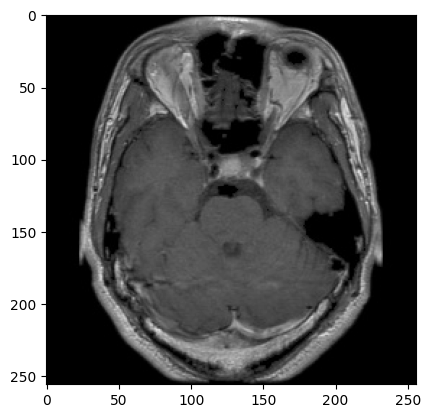

In [117]:
import matplotlib.pyplot as plt
# show images from training set
plt.imshow(train_data[0], cmap="gray")
plt.show()

# Automatically with Keras

In [119]:
import keras
import pathlib

data_dir = pathlib.Path(my_dir[:-15] + "/data")

# split data into training and validation and testing sets
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, # 20% validation set
    color_mode="grayscale",
    subset="training",
    seed=12345,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    save_to_dir=my_dir[:-15] + "/data/training/images"
)
# create a validation dataset
val_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    color_mode="grayscale",
    subset="validation",
    seed=12345,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    save_to_dir=my_dir[:-15] + "/data/validation/images"
)

Found 3291 files belonging to 4 classes.
Using 2633 files for training.
Found 3291 files belonging to 4 classes.
Using 658 files for validation.


['glioma_tumor', 'meningioma_tumor', 'normal_tumor', 'pituitary_tumor']